# 11. Finding signature of ectopic recombination
**Objective**: Find evidence for an inverse corrolation between element size and load.  
  
**Inputs**: 

+ `TE_counts/TEs.pkl`: A dictionary containing all the TE annotations

**Output**:   

+ All the outputs are inline. The corrolations are not inversed.
  
**Strategy**:  

+ Within each species, test the corrolation between the median sequence length of LTR families and their load.

## 11.1 Load TE annotations

In [1]:
from reprophylo import *
from scipy.stats.stats import pearsonr
%matplotlib inline

# read the dictionary in the next day
import cloud.serialization.cloudpickle as pickle
pickle_handle = open('TE_counts/TEs.pkl', 'rb')
All_SP_TEs = pickle.pickle.load(pickle_handle)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened



DNA
Ever
Ooch
Ovol
Acan

LTR
Hduj
Crem
Cele
C11sp
Hcon
briC
Bxyl
Cang
Cbre

LINE
Tcan
C5sp
Ovol
Dviv
Ebre

SINE


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


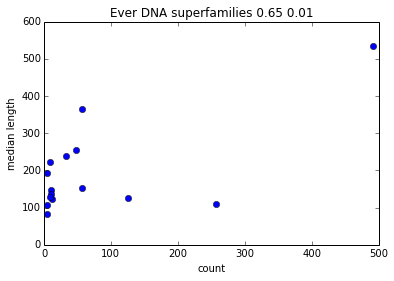

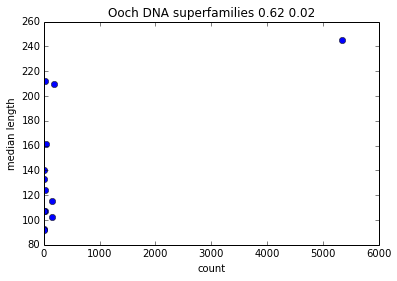

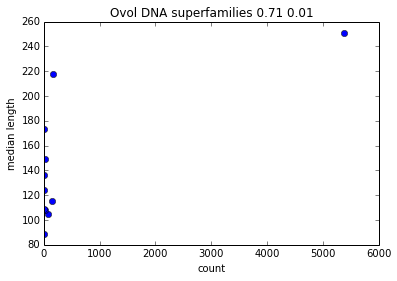

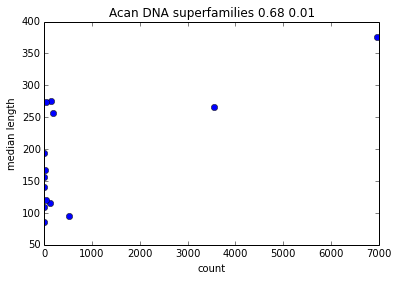

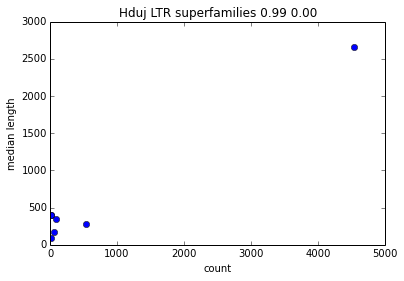

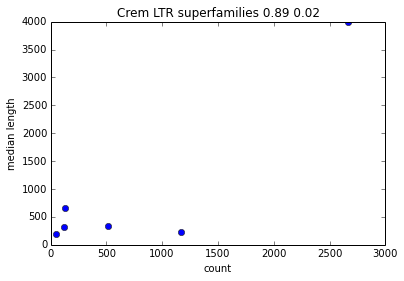

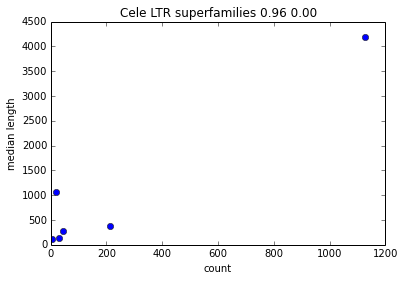

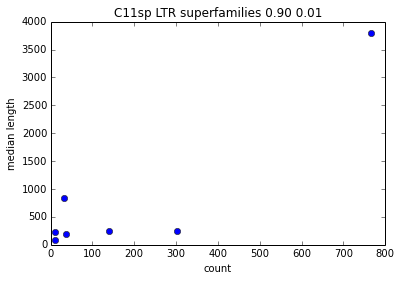

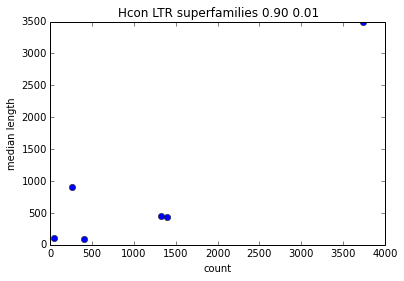

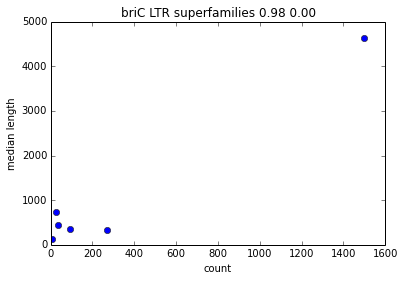

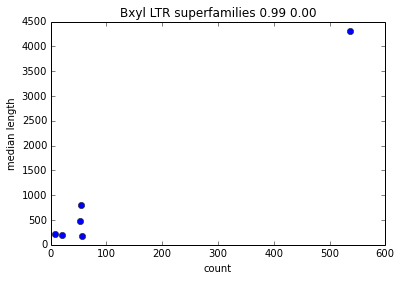

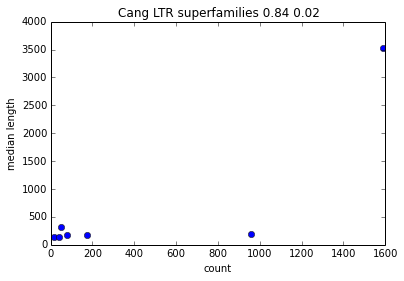

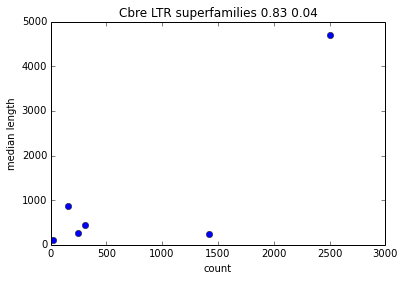

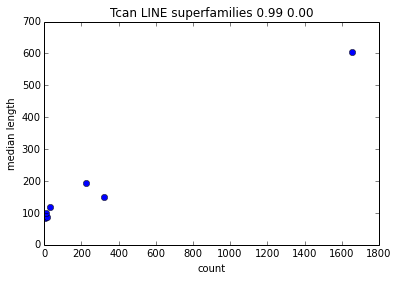

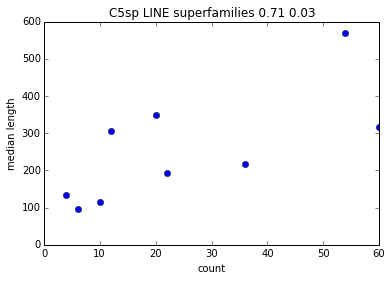

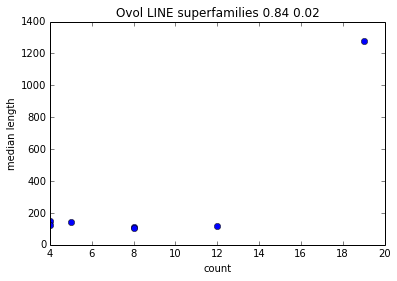

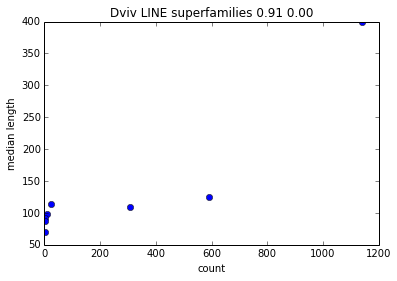

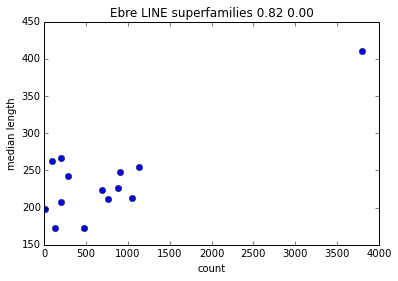

In [2]:
for Class in ['DNA','LTR','LINE','SINE']:
    print
    print Class
    corrolations = []
    for sp in All_SP_TEs.keys():
        counts_vs_lengths = {}
        elements = All_SP_TEs[sp]['taken']
        for e in elements:
            superfamily = elements[e]['higher_tx_level']
            if Class in superfamily:
                start = elements[e]['start']
                end = elements[e]['end']
                length = abs(int(end) - int(start))
                if superfamily in counts_vs_lengths:
                    counts_vs_lengths[superfamily].append(length)
                else:
                    counts_vs_lengths[superfamily] = [length]
        counts = []
        median_lengths = []
        for f in counts_vs_lengths:
            if len(counts_vs_lengths[f]) > 3:
                counts.append(len(counts_vs_lengths[f]))
                median_lengths.append(np.median(counts_vs_lengths[f]))
        #print counts, median_lengths
        if len(counts) > 5:
            r, p = pearsonr(counts, median_lengths)
            corrolations.append(p)
            if p < 0.05:
                print sp
                fig, ax1 = plt.subplots()
                plt.plot(counts, median_lengths, 'o')
                ax1.set_title(sp+' '+Class+' superfamilies '+"%.2f"%r+' '+"%.2f"%p)
                ax1.set_ylabel('median length')
                ax1.set_xlabel('count')
                fig.show()

